In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [368]:
df = pd.read_csv(r"C:\Users\ayaan\OneDrive\Desktop\Crime Rate Analysis Across Countries\hci_crime_752_pl_co_re_ca_2000-2013_21oct15-ada.csv", low_memory=False)

In [369]:
df.dropna(axis=1, how='all', inplace=True)
df.dropna(axis=0, how='all', inplace=True)

In [370]:
df.drop_duplicates(inplace=True)

In [371]:
df.columns = df.columns.str.strip().str.lower()

In [372]:
columns_to_drop = ['source', 'notes', 'unit_of_measure', 'indicator_id']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

In [373]:
df = df[df['dof_population'] > 0]

In [374]:
df.reset_index(drop=True, inplace=True)

In [375]:
df.head()

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,...,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
0,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
1,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
2,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
3,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
4,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,6.217499,6.190935,6.244063,0.013553,0.217985,NaN,1.0,33873086.0,10/21/2015


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38544 entries, 0 to 38543
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ind_id                  38544 non-null  object 
 1   ind_definition          38544 non-null  object 
 2   reportyear              38544 non-null  float64
 3   race_eth_code           38544 non-null  float64
 4   race_eth_name           38544 non-null  object 
 5   geotype                 38544 non-null  object 
 6   geotypevalue            38544 non-null  float64
 7   geoname                 38544 non-null  object 
 8   county_fips             37494 non-null  float64
 9   county_name             37494 non-null  object 
 10  region_code             38474 non-null  float64
 11  region_name             38474 non-null  object 
 12  strata_name_code        38544 non-null  float64
 13  strata_name             38544 non-null  object 
 14  strata_level_name_code  38544 non-null

In [377]:
df.isnull().sum()

ind_id                        0
ind_definition                0
reportyear                    0
race_eth_code                 0
race_eth_name                 0
geotype                       0
geotypevalue                  0
geoname                       0
county_fips                1050
county_name                1050
region_code                  70
region_name                  70
strata_name_code              0
strata_name                   0
strata_level_name_code        0
strata_level_name             0
numerator                  6385
denominator                1729
rate                      31271
ll_95ci                   31271
ul_95ci                   31271
se                        31271
rse                       31271
ca_decile                 32293
ca_rr                     31271
dof_population                0
version                       0
dtype: int64

In [378]:
df = df.dropna()

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6251 entries, 299 to 38473
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ind_id                  6251 non-null   object 
 1   ind_definition          6251 non-null   object 
 2   reportyear              6251 non-null   float64
 3   race_eth_code           6251 non-null   float64
 4   race_eth_name           6251 non-null   object 
 5   geotype                 6251 non-null   object 
 6   geotypevalue            6251 non-null   float64
 7   geoname                 6251 non-null   object 
 8   county_fips             6251 non-null   float64
 9   county_name             6251 non-null   object 
 10  region_code             6251 non-null   float64
 11  region_name             6251 non-null   object 
 12  strata_name_code        6251 non-null   float64
 13  strata_name             6251 non-null   object 
 14  strata_level_name_code  6251 non-null   fl

In [380]:
df_dropped = df.dropna()

In [381]:
df_dropped

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,...,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
299,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,PL,296.0,Adelanto city,6071.0,San Bernardino,...,18130.0,6.563707,5.384386,7.743027,0.601694,9.166985,3.0,1.055683,18130.0,10/21/2015
304,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,PL,394.0,Agoura Hills city,6037.0,Los Angeles,...,20537.0,1.752934,1.180309,2.325559,0.292156,16.666667,9.0,0.281936,20537.0,10/21/2015
309,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,PL,562.0,Alameda city,6001.0,Alameda,...,72259.0,4.179410,3.708034,4.650786,0.240498,5.754353,5.0,0.672201,72259.0,10/21/2015
314,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,PL,674.0,Albany city,6001.0,Alameda,...,16444.0,5.351496,4.233372,6.469620,0.570471,10.660036,4.0,0.860715,16444.0,10/21/2015
319,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,PL,884.0,Alhambra city,6037.0,Los Angeles,...,85804.0,2.948580,2.585244,3.311917,0.185376,6.286946,7.0,0.474239,85757.0,10/21/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38452,752,"Number of Violent Crimes per 1,000 Population",2013.0,9.0,Total,PL,86832.0,Yorba Linda city,6059.0,Orange,...,67492.0,0.444497,0.285436,0.603558,0.081154,18.257419,10.0,0.112274,66808.0,10/21/2015
38458,752,"Number of Violent Crimes per 1,000 Population",2013.0,9.0,Total,PL,86944.0,Yreka city,6093.0,Siskiyou,...,7639.0,6.414452,4.618406,8.210499,0.916350,14.285714,2.0,1.620204,7853.0,10/21/2015
38463,752,"Number of Violent Crimes per 1,000 Population",2013.0,9.0,Total,PL,86972.0,Yuba City city,6101.0,Sutter,...,65133.0,2.671457,2.274513,3.068401,0.202523,7.580980,6.0,0.674774,65401.0,10/21/2015
38468,752,"Number of Violent Crimes per 1,000 Population",2013.0,9.0,Total,PL,87042.0,Yucaipa city,6071.0,San Bernardino,...,52524.0,2.037164,1.651161,2.423167,0.196940,9.667365,7.0,0.514560,52486.0,10/21/2015


In [382]:
df['reportyear'] = pd.to_numeric(df['reportyear'], errors='coerce')
df['numerator'] = pd.to_numeric(df['numerator'], errors='coerce')
df['dof_population'] = pd.to_numeric(df['dof_population'], errors='coerce')

In [383]:
df['crime_rate_per_100k'] = (df['numerator'] / df['dof_population']) * 100000

In [384]:
top_10_crimes = df.groupby('strata_name')['numerator'].sum().sort_values(ascending=False).head(10)

In [385]:
df = df.dropna(subset=['reportyear', 'numerator', 'dof_population'])

In [386]:
sns.set(style="whitegrid")

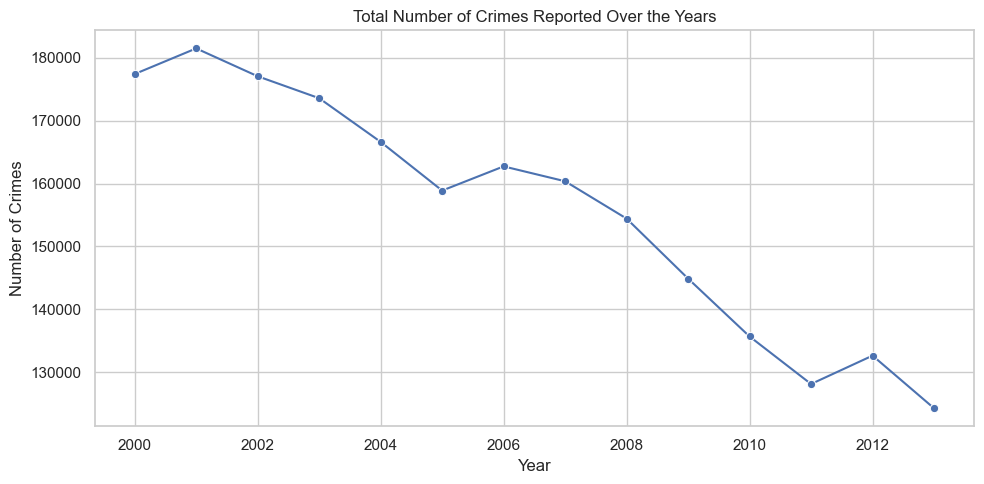

In [387]:
plt.figure(figsize=(10, 5))
yearly = df.groupby('reportyear')['numerator'].sum().reset_index()
sns.lineplot(data=yearly, x='reportyear', y='numerator', marker='o')
plt.title("Total Number of Crimes Reported Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()

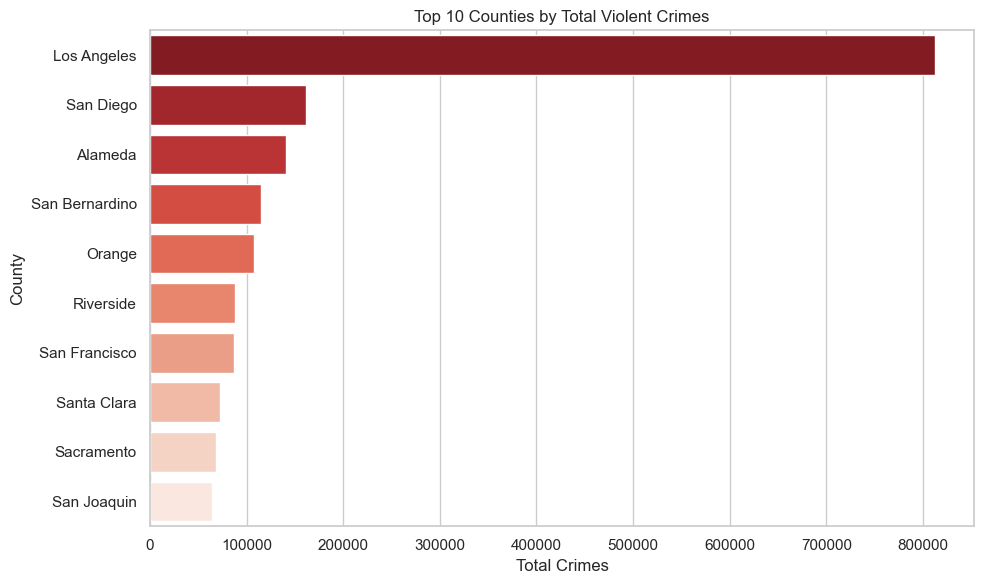

In [ ]:
top_10_crimes = df.groupby("county_name")["numerator"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_crimes.values,
    y=top_10_crimes.index,
    hue=top_10_crimes.index,  
    palette="Reds_r",
    legend=False             
)
plt.title("Top 10 Counties by Total Violent Crimes")
plt.xlabel("Total Crimes")
plt.ylabel("County")
plt.tight_layout()
plt.show()


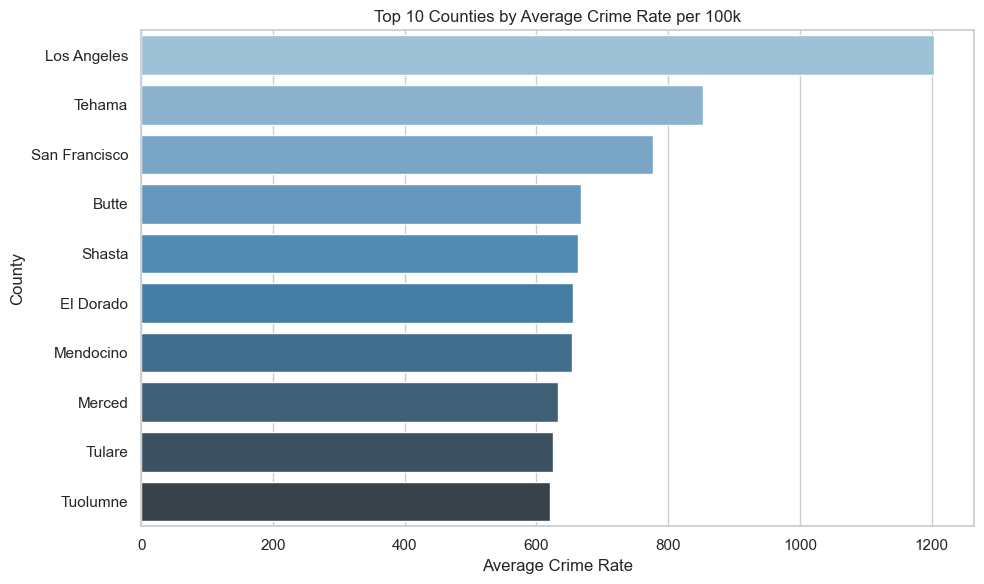

In [389]:
plt.figure(figsize=(10, 6))
county_rate = df.groupby('county_name')['crime_rate_per_100k'].mean().sort_values(ascending=False).head(10)
sns.barplot(
    x=county_rate.values,
    y=county_rate.index,
    hue=county_rate.index,    
    palette="Blues_d",
    legend=False              
)
plt.title("Top 10 Counties by Average Crime Rate per 100k")
plt.xlabel("Average Crime Rate")
plt.ylabel("County")
plt.tight_layout()
plt.show()

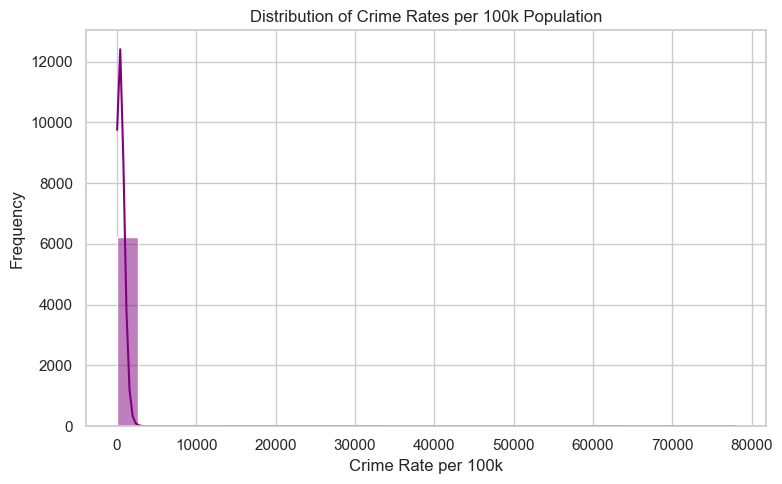

In [390]:
plt.figure(figsize=(8, 5))
sns.histplot(df['crime_rate_per_100k'], bins=30, kde=True, color='purple')
plt.title("Distribution of Crime Rates per 100k Population")
plt.xlabel("Crime Rate per 100k")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

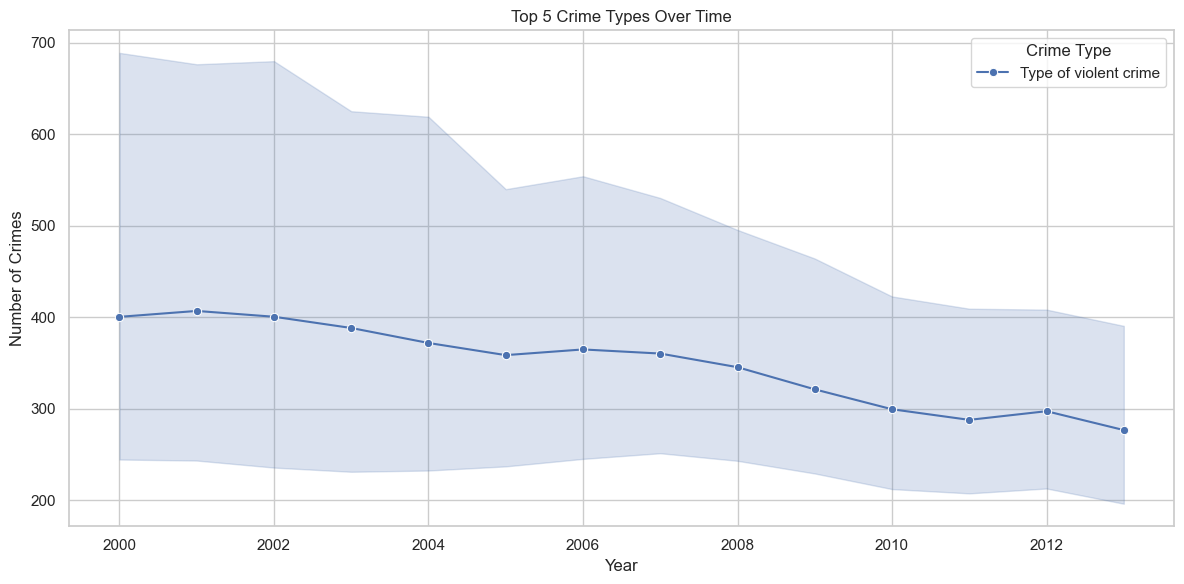

In [391]:
top_crimes = df['strata_name'].value_counts().head(5).index
df_top_crimes = df[df['strata_name'].isin(top_crimes)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_crimes, x='reportyear', y='numerator', hue='strata_name', marker='o')
plt.title("Top 5 Crime Types Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()

In [392]:
idx = df.groupby('county_name')['crime_rate_per_100k'].idxmax()
highest_rate_year = df.loc[idx, ['county_name', 'reportyear', 'crime_rate_per_100k']]
print(highest_rate_year.sort_values(by='crime_rate_per_100k', ascending=False).head(10))

       county_name  reportyear  crime_rate_per_100k
5240   Los Angeles      2001.0         77894.736842
21345     Monterey      2007.0          2657.807309
2334      Tuolumne      2000.0          2396.563418
2553      Siskiyou      2000.0          2316.991269
37551       Fresno      2013.0          2263.747998
16980     Humboldt      2006.0          2059.308072
31196      Alameda      2011.0          2048.857368
869         Merced      2000.0          1984.036488
26517        Butte      2009.0          1844.302077
20496   Sacramento      2007.0          1750.000000
